# Linear Regression


In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [7]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

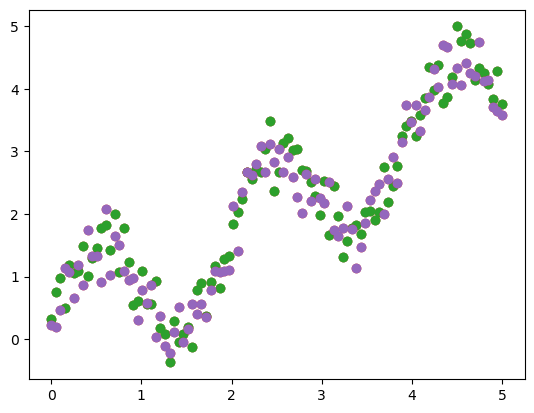

In [9]:
plt.scatter(x,y)
plt.show()

#### nonlinear

In [11]:
regr_lin = LinearRegression()

In [12]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [13]:
regr_lin.fit(X,y)

LinearRegression()

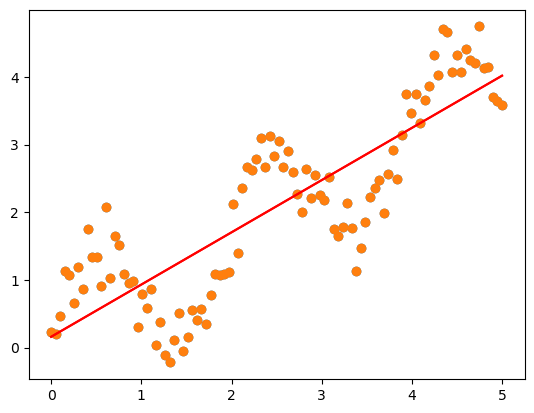

0.5300511534351388


In [15]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
plt.show()
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [16]:
print(x.shape)

(100,)


In [17]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [18]:
regr_poly = LinearRegression()

In [19]:
regr_poly.fit(X_poly, y)

LinearRegression()

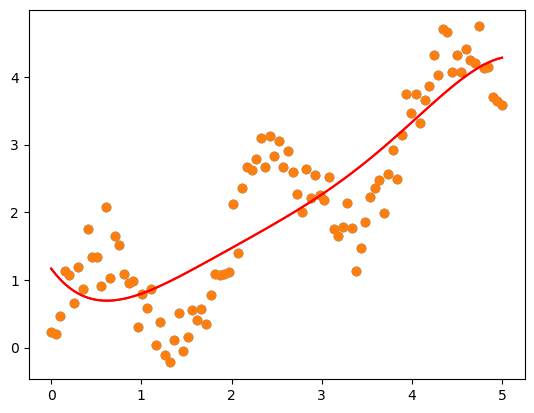

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')
plt.show()

In [16]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-0.47610227  0.9294618  -0.42798929  0.09698188 -0.00784717]
interception:  0.8828562606329244


In [17]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.88285626, 0.86112702, 0.84381738, 0.83061887, 0.8212375 ,
       0.81539355, 0.81282117, 0.8132681 , 0.81649541, 0.82227709,
       0.83039986, 0.84066275, 0.85287687, 0.86686504, 0.88246155,
       0.89951178, 0.91787193, 0.93740872, 0.95799903, 0.97952966,
       1.00189695, 1.02500653, 1.04877297, 1.0731195 , 1.09797767,
       1.12328708, 1.14899501, 1.17505619, 1.20143243, 1.22809232,
       1.25501095, 1.28216956, 1.30955527, 1.33716073, 1.36498385,
       1.39302747, 1.42129905, 1.44981037, 1.47857719, 1.507619  ,
       1.53695866, 1.56662209, 1.59663801, 1.62703756, 1.65785407,
       1.68912267, 1.72088003, 1.75316405, 1.78601354, 1.8194679 ,
       1.85356682, 1.88834998, 1.92385673, 1.96012578, 1.99719491,
       2.03510061, 2.07387784, 2.11355965, 2.15417695, 2.19575812,
       2.23832874, 2.2819113 , 2.32652484, 2.3721847 , 2.41890214,
       2.46668411, 2.51553288, 2.56544574, 2.61641472, 2.66842625,
       2.72146088, 2.77549293, 2.83049023, 2.88641374, 2.94321

In [18]:
regr_poly.predict(X_poly)

array([0.88285626, 0.86112702, 0.84381738, 0.83061887, 0.8212375 ,
       0.81539355, 0.81282117, 0.8132681 , 0.81649541, 0.82227709,
       0.83039986, 0.84066275, 0.85287687, 0.86686504, 0.88246155,
       0.89951178, 0.91787193, 0.93740872, 0.95799903, 0.97952966,
       1.00189695, 1.02500653, 1.04877297, 1.0731195 , 1.09797767,
       1.12328708, 1.14899501, 1.17505619, 1.20143243, 1.22809232,
       1.25501095, 1.28216956, 1.30955527, 1.33716073, 1.36498385,
       1.39302747, 1.42129905, 1.44981037, 1.47857719, 1.507619  ,
       1.53695866, 1.56662209, 1.59663801, 1.62703756, 1.65785407,
       1.68912267, 1.72088003, 1.75316405, 1.78601354, 1.8194679 ,
       1.85356682, 1.88834998, 1.92385673, 1.96012578, 1.99719491,
       2.03510061, 2.07387784, 2.11355965, 2.15417695, 2.19575812,
       2.23832874, 2.2819113 , 2.32652484, 2.3721847 , 2.41890214,
       2.46668411, 2.51553288, 2.56544574, 2.61641472, 2.66842625,
       2.72146088, 2.77549293, 2.83049023, 2.88641374, 2.94321

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [22]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [23]:
sigma = 0.3

In [24]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [25]:
regr_rbf = LinearRegression()

In [26]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

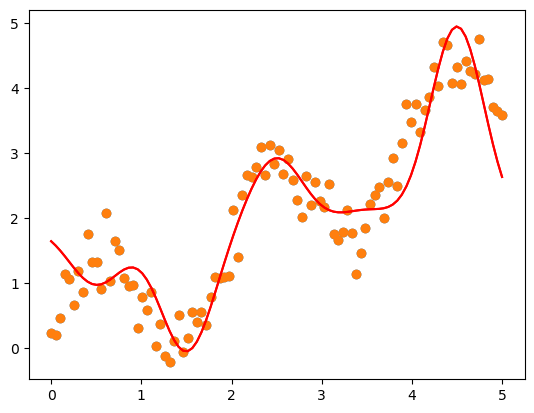

In [28]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')
plt.show()

In [25]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.72620466 -1.83462409  1.09615001 -0.01194894  3.09093005]
interception:  1.877906975572715


#### Comparison

In [29]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

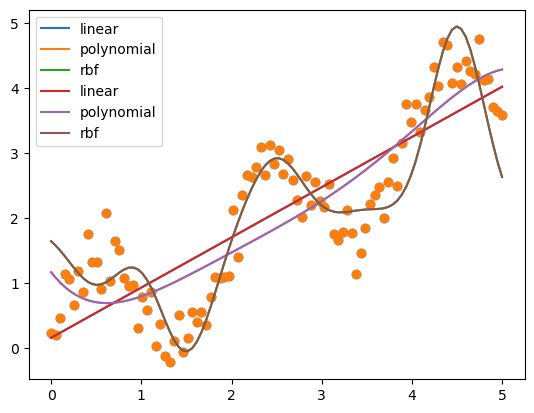

In [31]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()
plt.show()

## 請計算模型的MSE

In [32]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5300511534351388


In [33]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.4556376850337274


In [34]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2508277875775036
